## Introduction
This is a brief analysis of the structure of the data contained herein.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`.

**Importing some libraries to facilitate this exercise**

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There are 2 csv files in the current version of the dataset:


In [2]:
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        if filename.endswith(".csv"):
            print(os.path.join(dirname, filename))


./kaggle/input/MPs.csv
./kaggle/input/Senators.csv


Next we define functions for plotting data.

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now we're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/MPs.csv

In [7]:
nRowsRead = None # specify 'None' if want to read whole file
# MPs.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('./kaggle/input/MPs.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'MPs.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 351 rows and 6 columns


Let's take a quick look at what the data looks like:

In [8]:
df1.head(5)


,Member of Parliament,Photo,County,Constituency,Party,Status
0,"Hon. (Dr.) Keynan, Wehliye Adan, CBS, MP",http://www.parliament.go.ke/sites/default/file...,Wajir,Eldas,JP,Elected
1,"Hon. Abdi, Yusuf Hassan",http://www.parliament.go.ke/sites/default/file...,Nairobi,Kamukunji,JP,Elected
2,"Hon. Abdullah, Bashir Sheikh",http://www.parliament.go.ke/index.php/sites/de...,Mandera,Mandera North,JP,Elected
3,"Hon. Abuor, Paul",http://www.parliament.go.ke/sites/default/file...,Migori,Rongo,ODM,Elected
4,"Hon. Adagala, Beatrice Kahai",http://www.parliament.go.ke/sites/default/file...,Vihiga,Vihiga,ANC,Elected


Distribution graphs (histogram/bar graph) of sampled columns:

**Political Party and Election Status Distributions**

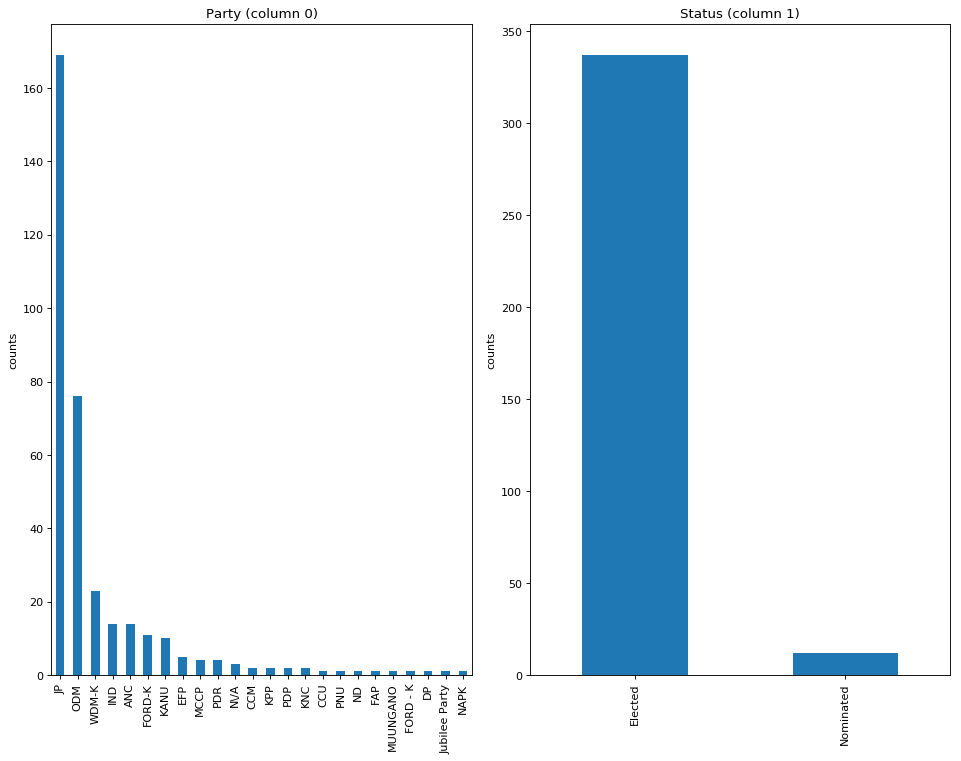

In [12]:
plotPerColumnDistribution(df1, 10, 5)

### Let's check 2nd file: /kaggle/input/Senators.csv

In [9]:
nRowsRead = None # specify 'None' if want to read whole file
# Senators.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('./kaggle/input/Senators.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'Senators.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 67 rows and 5 columns


Let's take a quick look at what the data looks like:

In [10]:
df2.head(5)

,Senator,Photo,County,Party,Status
0,Sen. (Dr.) Ali Abdullahi Ibrahim,http://www.parliament.go.ke/sites/default/file...,Wajir,JP,Elected
1,Sen. (Dr.) Inimah Getrude Musuruve,http://www.parliament.go.ke/sites/default/file...,N\/A,ODM,Nominated
2,Sen. (Dr.) Langat Christopher Andrew,http://www.parliament.go.ke/sites/default/file...,Bomet,JP,Elected
3,Sen. (Dr.) Milgo Alice Chepkorir,http://www.parliament.go.ke/sites/default/file...,N\/A,JP,Nominated
4,Sen. (Dr.) Zani Agnes Philomena,http://www.parliament.go.ke/sites/default/file...,N\/A,N\/A,Nominated


Distribution graphs (histogram/bar graph) of sampled columns:
**Political Party and Election Status Distributions**

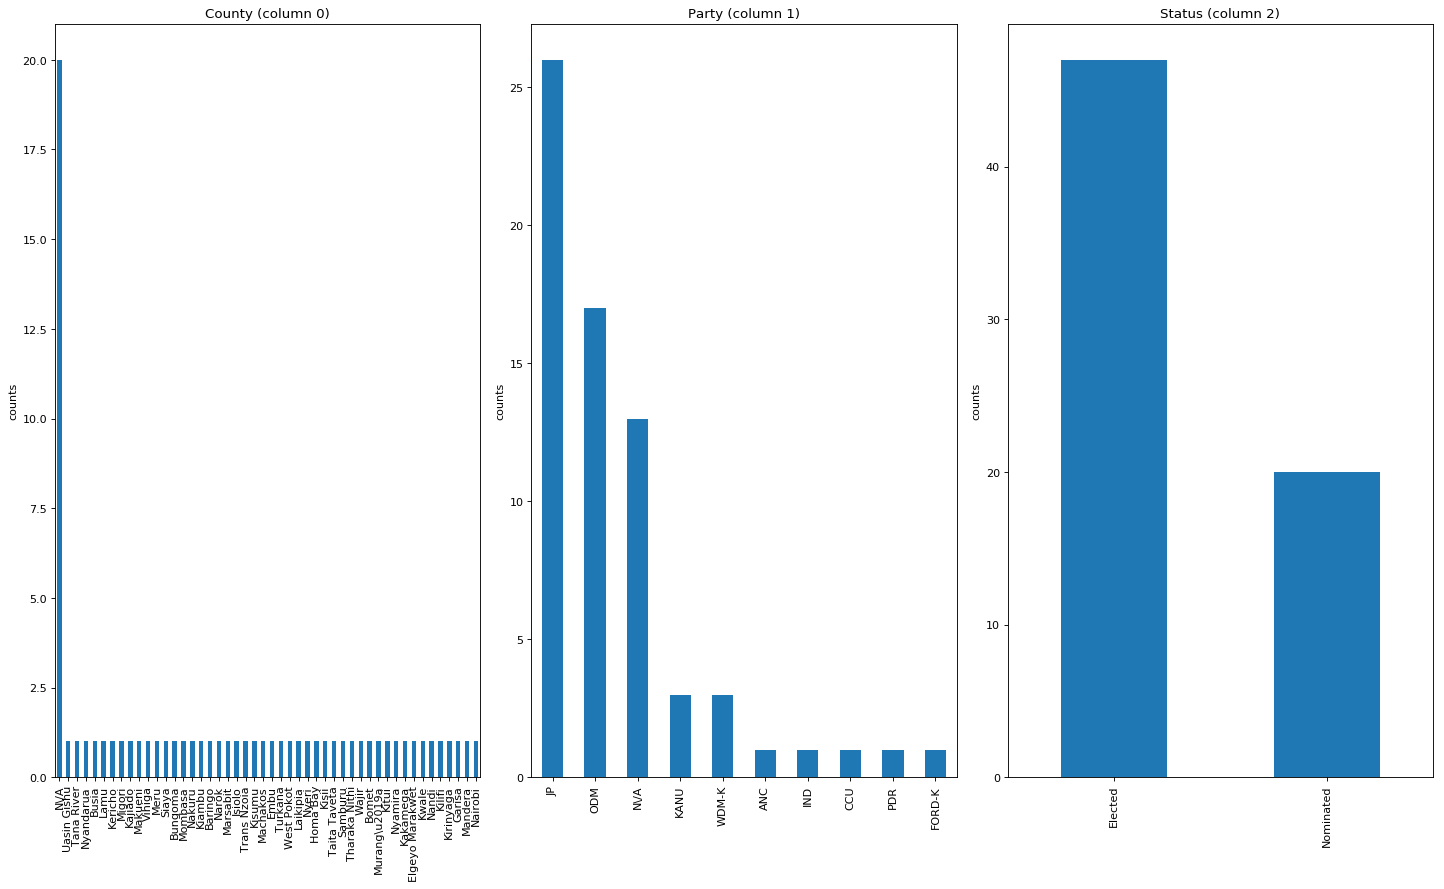

In [11]:
plotPerColumnDistribution(df2, 10, 5)

## Conclusion
* Jubilee has the tyranny of numbers in the current parliament
* ODM comes second
* Wiper third
*Some political party data is missing or the candindate was independent*